## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

## Préparation du dataset

### 1.0 Chargement des données

In [2]:
from constants import DATA_PATH

def create_pokedex() -> pd.DataFrame:
   return pd.read_csv(DATA_PATH)
    

In [3]:
pokedex = create_pokedex()
pokedex

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65.0,65,45,grass,poison,6.9,1.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80.0,80,60,grass,poison,13.0,1.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122.0,120,80,grass,poison,100.0,1.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60.0,50,65,fire,NaN,8.5,1.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80.0,65,80,fire,NaN,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,"['Water Absorb', 'Strong Jaw']",0.50,NaN,1.0,0.5,0.5,1.0,2.0,0.5,NaN,...,80.0,901,130.0,110,NaN,water,dragon,45.5,8.0,NaN
803,"['Rough Skin', 'Sand Rush']",0.25,0.5,NaN,1.0,NaN,1.0,NaN,0.5,1.0,...,NaN,902,NaN,100,55,ground,dragon,NaN,NaN,NaN
804,"['Contrary', 'Suction Cups', 'Infiltrator']",4.00,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,50.0,687,68.0,75,73,dark,psychic,47.0,6.0,0.0
805,"['Swift Swim', 'Storm Drain', 'Water Veil']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,50.0,456,49.0,61,66,water,NaN,7.0,4.0,0.0


In [4]:
# TODO: Afficher les 5 premières lignes du DataFrame

### 1.1 Suppression des colonnes non pertinentes

In [5]:
def filter_columns(df: pd.DataFrame) -> None:
    """
    Filtre les colonnes du DataFrame passé en paramètre pour ne garder que les colonnes utiles (voir README.md)
    L'opération est faite inplace (le DataFrame est modifié directement sans être retourné).
    
    @param df: Le DataFrame à filtrer.
    """
    df.drop(["abilities", "against_bug", "against_dark",	"against_dragon", "against_electric",	"against_fairy", "against_fight", "against_fire",	"against_flying", "against_ghost", "base_happiness",	"base_total", "capture_rate",	"classfication", "experience_growth", "height_m", "japanese_name", "percentage_male", "pokedex_number", "weight_kg", "against_grass", "against_ground", "against_ice", "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel", "against_water", "base_egg_steps"], axis=1, inplace=True)

In [6]:
filter_columns(pokedex)
pokedex

,attack,defense,hp,name,sp_attack,sp_defense,speed,type1,type2,generation,is_legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
802,110.0,120,NaN,HydroFang,130.0,110,NaN,water,dragon,8.0,NaN
803,NaN,100,75,TerraClaw,NaN,100,55,ground,dragon,NaN,NaN
804,92.0,88,86,Malamar,68.0,75,73,dark,psychic,6.0,0.0
805,49.0,56,49,Finneon,49.0,61,66,water,NaN,4.0,0.0


### 1.2 Renommage des colonnes restantes


In [7]:
def rename_columns(df: pd.DataFrame) -> None:
    """
    Renomme les colonnes du DataFrame passé en paramètre pour les rendre plus lisibles (voir README.md).
    L'opération est faite inplace.

    @param df: Le DataFrame à renommer.
    """
    df.rename(columns={"name": "Name", "type1": "Primary Type", "type2": "Secondary Type", "attack": "Attack", "defense": "Defense", "sp_attack": "Special Attack", "sp_defense": "Special Defense", "hp": "HP", "speed": "Speed", "generation": "Generation", "is_legendary": "Legendary"}, inplace=True)

In [8]:
rename_columns(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
802,110.0,120,NaN,HydroFang,130.0,110,NaN,water,dragon,8.0,NaN
803,NaN,100,75,TerraClaw,NaN,100,55,ground,dragon,NaN,NaN
804,92.0,88,86,Malamar,68.0,75,73,dark,psychic,6.0,0.0
805,49.0,56,49,Finneon,49.0,61,66,water,NaN,4.0,0.0


### 1.3. Nettoyage des données

In [9]:
def clean_data(df: pd.DataFrame) -> None:
    """ 
    Nettoie les données du DataFrame passé en paramètre pour les rendre plus lisibles (voir README.md).
    - Supprime les doublons
    - Supprime les lignes ayant des valeurs manquantes (sauf pour la colonne 'Secondary Type')
    - Réinitialise les index
    Les opérations sont faites inplace.

    @param df: Le DataFrame à nettoyer.
    """
    df.drop_duplicates(inplace=True)
    df.dropna(subset = df.columns.difference(["Secondary Type"]), inplace=True)
    df.reset_index(drop=True, inplace=True)

In [10]:
clean_data(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1.0,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1.0,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1.0,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1.0,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
796,101.0,103,97,Celesteela,107.0,101,61,steel,flying,7.0,1.0
797,181.0,131,59,Kartana,59.0,31,109,grass,steel,7.0,1.0
798,101.0,53,223,Guzzlord,97.0,53,43,dark,dragon,7.0,1.0
799,107.0,101,97,Necrozma,127.0,89,79,psychic,NaN,7.0,1.0


In [11]:
# Permet de vérifier les types de chaque colonne
# TODO: Décommenter la ligne suivante lorsque vous avez terminé la fonction clean_data
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attack           801 non-null    float64
 1   Defense          801 non-null    int64  
 2   HP               801 non-null    object 
 3   Name             801 non-null    object 
 4   Special Attack   801 non-null    float64
 5   Special Defense  801 non-null    int64  
 6   Speed            801 non-null    object 
 7   Primary Type     801 non-null    object 
 8   Secondary Type   417 non-null    object 
 9   Generation       801 non-null    float64
 10  Legendary        801 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 69.0+ KB


### 1.4 Correction des types de données

In [12]:
def correct_columns_types(df) -> None:
    """
    Corrige les types des colonnes du DataFrame passé en paramètre (voir README.md).
    Les opérations sont faites inplace.

    @param df: Le DataFrame dont les types des colonnes doivent être corrigés.
    """
    
    df[['Generation', 'HP', 'Speed']] = df[['Generation', 'HP', 'Speed']].astype(int)


In [13]:
correct_columns_types(pokedex)
pokedex

,Attack,Defense,HP,Name,Special Attack,Special Defense,Speed,Primary Type,Secondary Type,Generation,Legendary
0,49.0,49,45,Bulbasaur,65.0,65,45,grass,poison,1,0.0
1,62.0,63,60,Ivysaur,80.0,80,60,grass,poison,1,0.0
2,100.0,123,80,Venusaur,122.0,120,80,grass,poison,1,0.0
3,52.0,43,39,Charmander,60.0,50,65,fire,NaN,1,0.0
4,64.0,58,58,Charmeleon,80.0,65,80,fire,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
796,101.0,103,97,Celesteela,107.0,101,61,steel,flying,7,1.0
797,181.0,131,59,Kartana,59.0,31,109,grass,steel,7,1.0
798,101.0,53,223,Guzzlord,97.0,53,43,dark,dragon,7,1.0
799,107.0,101,97,Necrozma,127.0,89,79,psychic,NaN,7,1.0


In [14]:
# Permet de vérifier que les types des colonnes ont bien été corrigés
# TODO: Décommenter la ligne suivante lorsque vous avez terminé la fonction correct_columns_types
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attack           801 non-null    float64
 1   Defense          801 non-null    int64  
 2   HP               801 non-null    int64  
 3   Name             801 non-null    object 
 4   Special Attack   801 non-null    float64
 5   Special Defense  801 non-null    int64  
 6   Speed            801 non-null    int64  
 7   Primary Type     801 non-null    object 
 8   Secondary Type   417 non-null    object 
 9   Generation       801 non-null    int64  
 10  Legendary        801 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 69.0+ KB


## Visualisation de données

### 1.5 Le Spectre des Types

In [15]:
def display_types_pie_chart(df: pd.DataFrame) -> None:
    """
    Affiche un pie chart représentant la distribution des types primaires de Pokémon.

    @param df: Le DataFrame contenant les données à afficher.
    """
    fig = px.pie(
        df,
        names="Primary Type",
        width=800,
        height=600,
        title="Distribution des Types Primaires de Pokémon"
    )

    fig.update_traces(
        textinfo="percent+label"
    )


    fig.show()
    
display_types_pie_chart(pokedex)

### 1.6 La Course aux Légendes

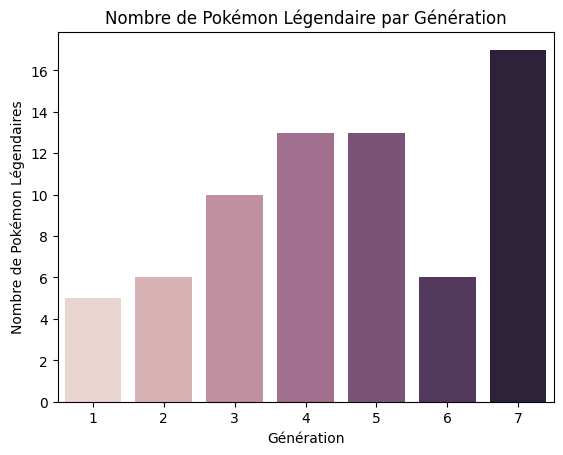

In [16]:
def display_lengends_hist(df: pd.DataFrame) -> None:
    """
    Affiche un histogramme représentant le nombre de Pokémon légendaires par génération.

    @param df: Le DataFrame contenant les données à afficher.
    """
    data = df.groupby('Generation')['Legendary'].sum().reset_index()
    
    ax = sns.barplot(data, x="Generation",y="Legendary",hue='Generation', legend=False)
    plt.xlabel('Génération')
    plt.ylabel('Nombre de Pokémon Légendaires')
    plt.title("Nombre de Pokémon Légendaire par Génération")
    

display_lengends_hist(pokedex)

### 1.7 L'Ascension Générationnelle

In [17]:
def display_stats_evolution(df: pd.DataFrame) -> None:
    """
    Affiche un graphique représentant l'évolution des statistiques moyennes des Pokémon par génération.

    @param df: Le DataFrame contenant les données à afficher.
    """
    data = df.groupby("Generation")[['Attack', 'Defense', 'HP','Special Attack', 'Special Defense', 'Speed']].mean().reset_index()
    fig = px.line(data, x="Generation", y=['Attack','Defense','HP','Special Attack', 'Special Defense', 'Speed'],markers=True )
    fig.update_layout(
        title="Évolution des Statistiques Moyennes par Génération",
        xaxis_title="Génération",
        yaxis_title="Statisitque Moyenne",
        legend_title="",
    )
    fig.show()
display_stats_evolution(pokedex)

### 1.8 Le Radar des Éléments


In [18]:
def display_types_radar_charts(df: pd.DataFrame) -> None:
    """
    Affiche un radar chart représentant les statistiques moyennes des Pokémon par type.

    @param df: Le DataFrame contenant les données à afficher.
    """
    data = df.groupby("Primary Type")[['Attack', 'Defense', 'HP']].mean().reset_index()
    # fig = px.line_polar(data, r='Attack', theta='Primary Type', line_close=True, markers=True)
    # fig.update_traces(fill='toself')
    fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3],subplot_titles=("Attack", "Defense", "HP"))

    fig.add_trace(go.Scatterpolar(
        r=data['Attack'],
        theta=data['Primary Type'],
        fill = "toself",
        subplot="polar1",
        name="Attack"
        
    ),1,1)
    fig.add_trace(go.Scatterpolar(
        r=data['Defense'],
        theta=data['Primary Type'],
        fill = "toself",
        subplot="polar2",
        name="Défense"
    ),1,2)
    fig.add_trace(go.Scatterpolar(
        r=data['HP'],
        theta=data['Primary Type'],
        fill = "toself",
        subplot="polar3",
        name="HP"

    ),1,3)

    fig.update_layout(
    title = "Radar Charts des statistiques moyennes par type de Pokémon",
    height=600, 
    width=1400,
    
)

    fig.show()

display_types_radar_charts(pokedex)

## Filtrage, tri et agrégation

### 1.9 Le Panthéon des Spécialistes

In [19]:
from IPython.display import display

def display_best_pokemon(df: pd.DataFrame) -> None:
    """
    Affiche les 5 meilleurs Pokémon pour chaque statistique (voir README.md).

    @param df: Le DataFrame contenant les données à afficher.
    """
    stats = ['Attack','Defense', 'HP']

    # data = df[['Attack','Defense', 'HP']].sort_values(by=['Attack','Defense', 'HP'],ascending=False).reset_index().take([0,1,2,3,4,5])
    for column in stats:
        print("Meilleur Pokémon pour " + column)
        data = df[column].sort_values(ascending=False).reset_index().take([0,1,2,3,4,5])
        display(data)

display_best_pokemon(pokedex)

Meilleur Pokémon pour Attack


,index,Attack
0,213,185.0
1,797,181.0
2,382,180.0
3,383,180.0
4,444,170.0
5,408,165.0


Meilleur Pokémon pour Defense


,index,Defense
0,305,230
1,212,230
2,207,230
3,376,200
4,712,184
5,90,180


Meilleur Pokémon pour HP


,index,HP
0,241,255
1,112,250
2,798,223
3,717,216
4,201,190
5,320,170


### 1.10 Les Liens Invisibles


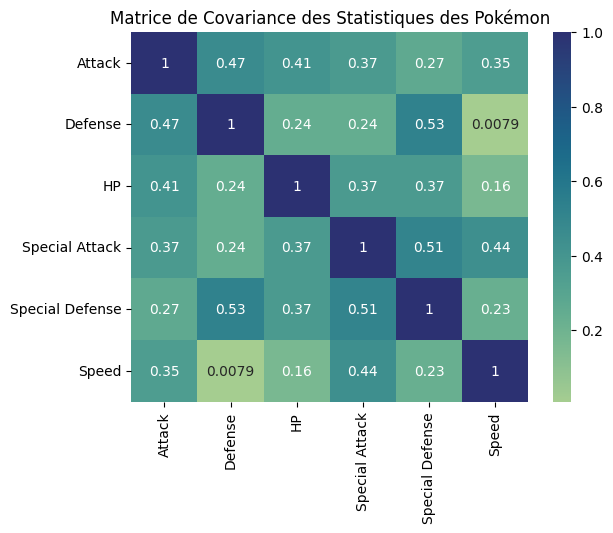

In [20]:
def display_stats_heatmap(df: pd.DataFrame) -> None:
    """S
    Affiche une heatmap représentant la matrice de corrélation entre les statistiques des Pokémon.

    @param df: Le DataFrame contenant les données à afficher.
    """
    data = df.drop(['Name', 'Primary Type', 'Secondary Type','Generation', 'Legendary'],axis=1)
    heatmap = sns.heatmap(data.corr(),annot=True,cmap='crest')
    heatmap.set_title('Matrice de Covariance des Statistiques des Pokémon')

display_stats_heatmap(pokedex)